**Análisis y Modelado**

Análisis y Modelado de Data para nuestro modelo de Machine Learning

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

Luego de importar las librerías ingestaremos con un archivo JSON y convertiremos sus líneas en objeto de Python para almacenarlos en la lista 'rows'. Al final del proceso, la lista 'rows' contendrá todos los objetos del archivo JSON.

In [2]:
rows = []
with open('steam_games.json') as file:
    for line in file.readlines():
        rows.append(ast.literal_eval(line))

Convertimos la lista 'rows' en un DataFrame de pandas y luego inspeccionamos los datos.

In [3]:
df = pd.DataFrame(rows)
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


A continuación verificamos, con una visión general de los datos, su estructura y observaremos los detalles.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


A continuación utilizaremos un gráfico de barras para visualizar los valores nulos.

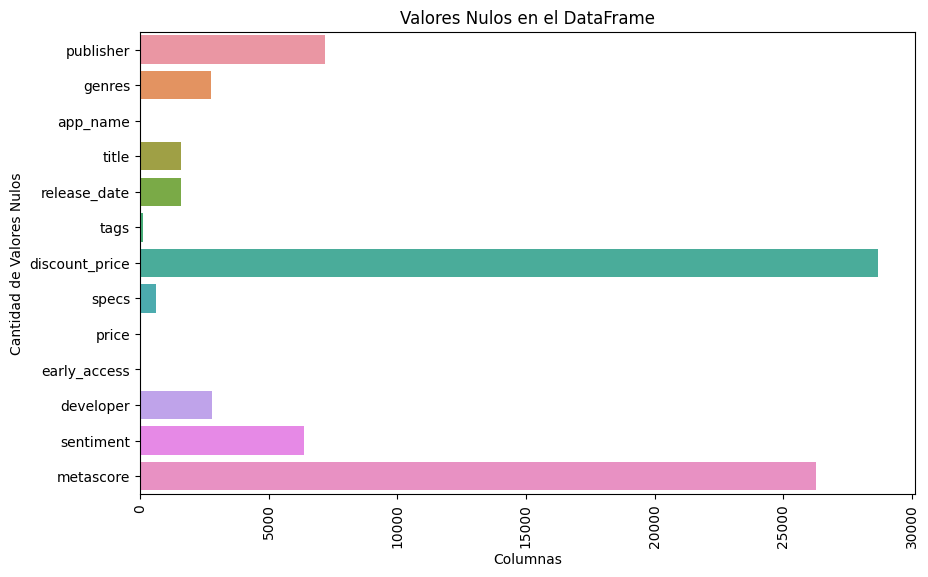

In [20]:

plt.figure(figsize=(10, 6))
sns.barplot(x=df.isna().sum(), y=df.columns)
plt.xticks(rotation=90)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Valores Nulos en el DataFrame')
plt.show()


**Limpieza**

Descartamos las columnas de URLs e IDs que no son relevantes para el modelo de Machine Learning.

In [7]:
df = df.drop(['url', 'reviews_url', 'id'], axis=1)

Verificamos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   release_date    30068 non-null  object 
 5   tags            31972 non-null  object 
 6   discount_price  225 non-null    float64
 7   specs           31465 non-null  object 
 8   price           30758 non-null  object 
 9   early_access    32135 non-null  bool   
 10  developer       28836 non-null  object 
 11  sentiment       24953 non-null  object 
 12  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(11)
memory usage: 3.0+ MB


A continuación calcularemos y verificaremos cuántos registros duplicados fueron eliminados y cuántos registros totales existen en el DataFrame original.

In [9]:
filas = df.shape[0]

df.drop_duplicates(subset=['publisher',
                           'app_name',
                           'title',
                           'release_date',
                           'discount_price',
                           'price',
                           'early_access',
                           'developer',
                           'sentiment',
                           'metascore'], inplace=True)

duplicados = filas - df.shape[0]

print(f"Filas: {filas}")
print(f"Filas duplicadas: {duplicados}")

Filas: 32135
Filas duplicadas: 2


Haremos una lista con los nombres de las columnas del DataFrame

In [10]:
df.columns.to_list()

['publisher',
 'genres',
 'app_name',
 'title',
 'release_date',
 'tags',
 'discount_price',
 'specs',
 'price',
 'early_access',
 'developer',
 'sentiment',
 'metascore']

**VARIABLES**

Analisaremos las siguientes variables

*PRICE*

Esta es una de las variables más valiosas, no solo por la información que nos puede dar, sino porque será la que intentemos predecir.

Comenzaremos con una visualización

In [14]:
df.head(20)

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.79,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,NaN
6,NaN,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,Poppermost Productions,NaN,NaN
7,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,"[Single-player, Multi-player, Online Multi-Pla...",18.99,False,Poppermost Productions,NaN,NaN
8,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,"[Single-player, Multi-player, Online Multi-Pla...",29.99,False,Poppermost Productions,NaN,NaN
9,RewindApp,"[Casual, Indie, Racing, Simulation]",Race,Race,2018-01-04,"[Indie, Casual, Simulation, Racing]",NaN,"[Single-player, Multi-player, Partial Controll...",NaN,False,RewindApp,NaN,NaN


Luego de la visualización notamos que hay varios juegos que son considerados 'Free to play' y juegos que no tienen precio, NaN.

Ambos son considerados com un obstáculo si lo que queremos es calcular el precio de los juegos.

Por este motivo, a continuación haremos primero un conteo y luego los eliminaremos.

Conteo Free to play Games:

In [13]:
free = (df['price'].str.lower() == 'free to play').sum()
print(f'Free to play Games: {free}')

Free to play Games: 982


Conteo Juegos sin precio:

In [15]:
sin_precio = df['price'].isna().sum()

print(f'Juegos sin precio: {sin_precio}')

Juegos sin precio: 1377



Convertiremos la columna 'price' en valores numéricos y dejaremos como NaN aquellos que no podramos convertir.

Luego verificamos:

In [17]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.head()

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",NaN,False,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,"[Single-player, Multi-player, Online Multi-Pla...",NaN,False,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.79,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN


A continuación eliminaremos las filas que contienen valores nulos en la columna 'price'.

Y luego verificamos.

In [18]:
df.dropna(subset=['price'], inplace=True)
df.head()

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,[Single-player],4.99,False,Kotoshiro,NaN,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",0.83,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1.79,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,NaN
6,NaN,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",NaN,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,Poppermost Productions,NaN,NaN


*discount_price*

Transformamos las columnas 'discount_price' a numérico para poder trabajar en ella.

In [ ]:
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

Calculamos el 'Descuento Promedio' que se aplica:

In [22]:
print(f"Descuento Promedio: {round((1 - ((df.discount_price / df.price).mean())), 2) * 100}%")

Descuento Promedio: 38.0%


Buscamos una relación entre 'precio' y 'precio con descuento'

In [23]:
print(f"Coeficiente de Pearson: {round(df['discount_price'].corr(df['price']), 2)}")

Coeficiente de Pearson: 0.91


Observamos que existe una correlación significativa entre estas dos variables, ya que el precio con descuento tiende a ser un porcentaje del precio original del juego, con un promedio de descuento del 38%.

Dado este patrón, abordaremos la variable desde una perspectiva binaria: "con descuento" y "sin descuento", y exploraremos la correlación desde una nueva perspectiva.

Antes que nada, haremos una copia para preservar el DataFrame.

In [24]:
df_discount = df.copy()

***
df_discount['discount_price'].values[df_discount['discount_price'].values > 0] = 1

df_discount.head()


MODIFICACIÓN SUGERIDA:

El código que proporcionaste intenta asignar el valor 1 a los elementos en la columna 'discount_price' de un DataFrame llamado df_discount cuando el valor en esa columna es mayor que 0. Esencialmente, está tratando de crear una variable binaria indicando si hay un descuento en el precio (1) o no (0).

Sin embargo, esta forma de asignar valores a través de .values no es la mejor práctica, ya que podría tener efectos no deseados y comportamientos impredecibles en ciertas situaciones.

Esto crea una nueva columna 'discount_price' en el DataFrame df_discount donde los valores se convierten en 1 si el valor original era mayor que 0, y en 0 en caso contrario.

Una forma más segura y adecuada de hacer esto sería:
***

In [26]:
df_discount['discount_price'] = (df_discount['discount_price'] > 0).astype(int)
df_discount.head()

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",1,[Single-player],4.99,False,Kotoshiro,NaN,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",1,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",0,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,NaN
6,NaN,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",0,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,Poppermost Productions,NaN,NaN


Completamos los valores faltantes (NaN) en la columna 'discount_price' con valor 0 utilizando. 
Cualquier celda vacía en la columna 'discount_price' será reemplazada por 0, lo que indica que no hay ningún descuento en esos casos.

Luego verificamos

In [27]:
df_discount['discount_price'] = df_discount['discount_price'].fillna(0)
df_discount.head()

,publisher,genres,app_name,title,release_date,tags,discount_price,specs,price,early_access,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",1,[Single-player],4.99,False,Kotoshiro,NaN,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",1,[Single-player],0.99,False,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,NaN,"[Action, Indie, Casual, Sports]",1,"[Single-player, Full controller support, HTC V...",2.99,False,NaN,NaN,NaN
5,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",0,"[Single-player, Steam Achievements]",3.99,False,Trickjump Games Ltd,Mixed,NaN
6,NaN,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,2018-01-04,"[Free to Play, Indie, Simulation, Sports]",0,"[Single-player, Multi-player, Online Multi-Pla...",9.99,False,Poppermost Productions,NaN,NaN


A continuación calculanremos y mostraremos la cantidad de juegos en oferta y la cantidad de juegos a precio de lista en el DataFrame.

In [29]:
juegos_en_oferta = df_discount['discount_price'].sum()
juegos_precio_de_lista = df_discount.shape[0] - juegos_en_oferta

print(f"Juegos en oferta: {juegos_en_oferta}")
print(f"Juegos a precio de lista: {juegos_precio_de_lista}")

Juegos en oferta: 160
Juegos a precio de lista: 28686


Notamos una correlación bastante baja.

In [30]:
print(f"Coeficiente de Pearson: {round(df_discount['discount_price'].corr(df_discount['price']), 3)}")

Coeficiente de Pearson: -0.013


Es lógico que la correlación sea limitada, dado que la cantidad de juegos en oferta es reducida. 

Debido a que incluso los títulos más destacados eventualmente se ofertan y estas ofertas son temporales, la presencia de descuentos está sujeta al momento de recopilación de los datos. 

Por estos motivos, optamos por eliminar la columna de descuentos, ya que podría impactar negativamente en el modelo.

In [31]:
df = df.drop(['discount_price'], axis=1)

*sentiment*

Debido a que Steam evalúa los juegos en función de la cantidad de reseñas y sus puntuaciones, esta variable resulta de un particular interés.

Analizaremos el DataFrame agrupando los datos según la columna 'sentiment' y contaremos la cantidad de registros en cada grupo.

Luego, los resultados se ordenaran en orden descendente. 

Esto nos permitirá identificar la distribución de los sentimientos en los datos y determinar qué sentimientos son más frecuentes en el conjunto de datos.

In [32]:
df.groupby('sentiment')['sentiment'].count().sort_values(ascending=False)

sentiment
Mixed                      3522
Very Positive              3409
Positive                   2979
Mostly Positive            2392
1 user reviews             2357
2 user reviews             1640
3 user reviews             1148
4 user reviews              889
5 user reviews              783
Mostly Negative             710
6 user reviews              696
7 user reviews              563
8 user reviews              497
9 user reviews              454
Overwhelmingly Positive     273
Negative                    118
Very Negative                24
Overwhelmingly Negative       6
Name: sentiment, dtype: int64

Podemos hacer las siguientes observaciones y evaluaciones de los resultados de la columna 'sentiment':

Distribución de Sentimientos: La distribución de sentimientos es variada, abarcando desde opiniones muy positivas hasta muy negativas.

Sentimientos Positivos Predominantes: Los sentimientos predominantemente positivos como "Mixed", "Very Positive", "Positive" y "Mostly Positive" tienen un número significativo de registros. Esto sugiere que la mayoría de los juegos han recibido respuestas positivas de los usuarios.

Variedad en Sentimientos: Existe una variedad de sentimientos en los juegos, incluidos aquellos con menos reseñas ("1 user reviews", "2 user reviews") y aquellos con sentimientos más negativos ("Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"). Esto refleja la diversidad en la percepción de los usuarios hacia los juegos.

Alta Participación de Usuarios: Hay una cantidad considerable de juegos con un número bajo a moderado de reseñas ("1 user reviews" hasta "9 user reviews"), lo que indica que muchos juegos tienen interacción de los usuarios.

Sentimientos Extremos: Los sentimientos "Overwhelmingly Positive" y "Overwhelmingly Negative" representan extremos en la percepción de los usuarios y son menos comunes en comparación con otros sentimientos.

En general, esta distribución de sentimientos proporciona una visión amplia de cómo los usuarios perciben los juegos en la plataforma Steam, y es importante tener en cuenta esta diversidad al desarrollar un modelo de recomendación. También observamos que, además de los nueve posibles niveles de calificación, existen categorías con menos de 10 reseñas, lo que les impide obtener una calificación numérica. Dada esta particularidad, abordaremos esta variable como "Categórica Ordinal". 

Por ultimo notamos que los juegos con pocas reseñas suelen ser de desarrolladores más pequeños, lo que suele resultar en precios más bajos. Incluso dentro de este conjunto de datos, encontramos elementos como contenido descargable (DLC), como veremos a continuación:

In [33]:
(pd.DataFrame(df.groupby('app_name')['app_name'].count().sort_values(ascending=False))).tail(6)

,app_name
app_name,
FortressCraft Evolved: Skin Pack #1,1
FortressCraft Evolved: Frozen Factory Expansion,1
FortressCraft Evolved!,1
FortressCraft Evolved Dapper Indie Supporter's Pack,1
Fortix 2,1
🔴 Circles,1


Dado que los juegos con al menos una reseña muy probablemente no sean contenido descargable (DLC), los categorizaremos con el valor ordinal más bajo.

A continuación transformaremos el DataFrame para darle valores ordinales definidos en el diccionario 'orden'. 
Esta transformación será de gran utilidad para tratar el sentimiento como una característica numérica en modelos de aprendizaje automático que realizaremos a futuro.

In [34]:
orden = {"1 user reviews":1,
         "2 user reviews":1,
         "3 user reviews":1,
         "4 user reviews":1,
         "5 user reviews":1,
         "6 user reviews":1,
         "7 user reviews":1,
         "8 user reviews":1,
         "9 user reviews":1,
         "Overwhelmingly Negative":2,
         "Very Negative":3,
         "Negative":4,
         "Mostly Negative":5,
         "Mixed":6,
         "Mostly Positive":7,
         "Positive":8,
         "Very Positive":9,
         "Overwhelmingly Positive":10,
         }

df["sentiment"] = df["sentiment"].replace(orden)

Completaremos los valores faltantes (NaN) en la columna 'sentiment' con el valor 0.

In [35]:
df['sentiment'] = df['sentiment'].fillna(0)

A continuación agruparemos y haremos un recuento de los valores en la columna 'sentiment'. 

Luego, oredenaremos los resultados en orden descendente.

In [36]:
df.groupby('sentiment')['sentiment'].count().sort_values(ascending=False)

sentiment
1.0     9027
0.0     6386
6.0     3522
9.0     3409
8.0     2979
7.0     2392
5.0      710
10.0     273
4.0      118
3.0       24
2.0        6
Name: sentiment, dtype: int64